In [43]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas_datareader import data
import datetime as dt
from datetime import datetime


# Get Response Data -- SHORTVOL index

Get data from Yahoo since 2008-01-07

In [44]:
# get SHORTVOL data from Yahoo. Thanks for letting me know, Stuart ^_^

svix = data.DataReader('^SHORTVOL', 'yahoo', '1990-01-01')
svix_rets = svix['Adj Close'].pct_change().dropna()
svix_rets = svix_rets['2008-01-07':]
svix_rets.head()

Date
2008-01-07    0.016092
2008-01-08   -0.021566
2008-01-09   -0.003674
2008-01-10    0.037562
2008-01-11   -0.043531
Name: Adj Close, dtype: float64

Get variable data from my dropbox (calculated in R). 

Plot a heatmap of missing variable data. 

Start some imputations.

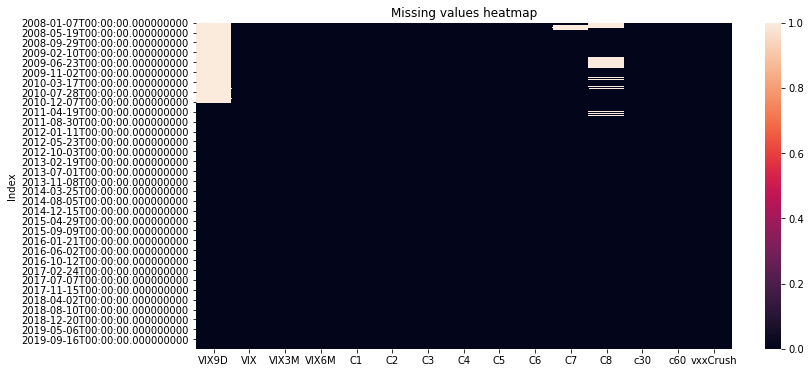

In [45]:
# Get variables from my dropbox. These things are calculated in R because I have my workflow set up in R already. 
# Will have to learn how to dynamically update the dropbox

variables = pd.read_csv("https://www.dropbox.com/s/ykimtkrwpxp80o9/rawVariables.csv?raw=1", parse_dates=True, index_col=0)
variables.head()
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(variables.isnull())
plt.title('Missing values heatmap')
plt.show()


In [46]:

variables['2018-12-04':'2018-12-06']
variables.loc['2018-12-05',['VIX9D', 'VIX', 'VIX3M', 'VIX6M', 'vxxCrush']] = variables.loc['2018-12-04',['VIX9D', 'VIX', 'VIX3M', 'VIX6M', 'vxxCrush']]
variables['2018-12-04':'2018-12-06']

,VIX9D,VIX,VIX3M,VIX6M,C1,C2,C3,C4,C5,C6,C7,C8,c30,c60,vxxCrush
Index,,,,,,,,,,,,,,,
2018-12-04,25.10,20.74,20.75,20.60,19.425,19.275,19.125,19.175,18.975,18.975,18.975,19.100,19.361842,19.353947,-0.328135
2018-12-05,25.10,20.74,20.75,20.60,19.025,19.050,18.975,19.025,18.900,18.900,18.925,19.100,19.036842,19.085526,-0.328135
2018-12-06,25.11,21.19,21.06,20.83,19.925,19.475,19.225,19.275,19.075,19.025,19.025,19.225,19.688158,19.580263,-0.352122


# Initial Feature Engineering -- Contangos and Ratios

Do some feature engineering here. Create the following variables:

M1 roll yield: C1/VIX - 1  
VX30 roll yield: C30 (30 day constant maturity) / VIX - 1  
Contango: C2/C1 - 1  
Adjusted Contango: C60 (60 day constant maturity) / C30 - 1  
M4M7 Contango: C7/C4 - 1  
Fast Cross: VIX9D/VIX  
Medium Cross: VIX/VIX3M  
Slow Cross: VIX/VIX6M  
Strat Cross: VIX3M/VIX6M  

In [47]:
# Do some feature engineering -- roll yields and crossover ratios 
# like the one found in my strategy -- called stratcross here

variables['m1_roll_yield'] = variables['C1']/variables['VIX']-1
variables['VX30_roll_yield'] = variables['c30']/variables['VIX']-1
variables['contango'] = variables['C2']/variables['C1']-1
variables['adj_contango'] = variables['c60']/variables['c30']-1
variables['m4m7_contango'] = variables['C7']/variables['C4']-1
variables['fastcross'] = variables['VIX9D']/variables['VIX']
variables['medcross'] = variables['VIX']/variables['VIX3M']
variables['slowcross'] = variables['VIX']/variables['VIX6M']
variables['stratcross'] = variables['VIX3M']/variables['VIX6M']


In [48]:

variables.head()

,VIX9D,VIX,VIX3M,VIX6M,C1,C2,C3,C4,C5,C6,...,vxxCrush,m1_roll_yield,VX30_roll_yield,contango,adj_contango,m4m7_contango,fastcross,medcross,slowcross,stratcross
Index,,,,,,,,,,,,,,,,,,,,,
2008-01-07,NaN,23.79,23.22,24.22,24.12,24.81,24.54,24.45,24.37,24.28,...,0.171019,0.013871,0.031596,0.028607,0.017657,-0.013088,NaN,1.024548,0.982246,0.958712
2008-01-08,NaN,25.43,25.49,25.18,25.54,25.90,25.52,25.35,25.17,25.07,...,0.074774,0.004326,0.013763,0.014096,0.012844,-0.019329,NaN,0.997646,1.009929,1.012311
2008-01-09,NaN,24.12,24.50,24.48,24.89,25.78,25.28,24.76,24.66,24.49,...,0.318373,0.031924,0.058573,0.035757,0.019474,-0.014943,NaN,0.984490,0.985294,1.000817
2008-01-10,NaN,23.45,23.95,24.57,24.07,24.95,24.51,24.36,24.27,24.15,...,0.301873,0.026439,0.055627,0.036560,0.015800,-0.019704,NaN,0.979123,0.954416,0.974766
2008-01-11,NaN,23.68,24.50,24.96,24.96,26.15,26.05,25.92,25.50,25.50,...,0.522062,0.054054,0.095932,0.047676,0.009141,-0.025849,NaN,0.966531,0.948718,0.981571


In [9]:
variables.shape
variables.tail()

,VIX9D,VIX,VIX3M,VIX6M,C1,C2,C3,C4,C5,C6,...,vxxCrush,m1_roll_yield,VX30_roll_yield,contango,adj_contango,m4m7_contango,fastcross,medcross,slowcross,stratcross
Index,,,,,,,,,,,,,,,,,,,,,
2020-01-15,9.69,12.42,14.63,15.98,12.925,15.175,15.575,16.175,16.425,16.825,...,0.812751,0.040660,0.188882,0.174081,0.026474,0.058733,0.780193,0.848941,0.777222,0.915519
2020-01-16,9.71,12.32,14.45,15.78,12.575,14.925,15.375,15.975,16.225,16.625,...,0.768483,0.020698,0.185434,0.186879,0.021942,0.062598,0.788149,0.852595,0.780735,0.915716
2020-01-17,9.04,12.10,14.41,15.76,12.525,14.925,15.375,16.025,16.325,16.725,...,0.912071,0.035124,0.215440,0.191617,0.016226,0.062402,0.747107,0.839695,0.767766,0.914340
2020-01-21,11.38,12.85,14.87,15.94,12.925,15.075,15.525,16.025,16.250,16.675,...,0.696943,0.005837,0.165547,0.166344,0.009256,0.060842,0.885603,0.864156,0.806148,0.932873
2020-01-22,11.03,12.91,14.98,16.11,12.620,15.175,15.725,16.275,16.525,16.875,...,0.869970,-0.022463,0.175445,0.202456,0.000000,0.052227,0.854376,0.861816,0.801366,0.929857


# The Response Variable and Variable Histograms

Create the response variable -- sign of the returns of SHORTVOL two days in the future.  
Let's also plot some histograms of some variables, such as the returns, a futures contract, and a contango relationship.

Date
2008-01-07    1
2008-01-08   -1
2008-01-09   -1
2008-01-10    1
2008-01-11   -1
Name: Adj Close, dtype: int64

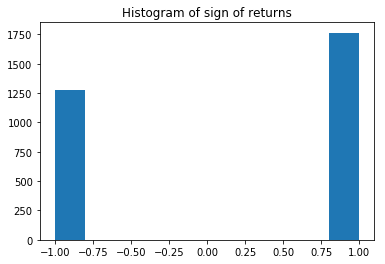

In [6]:
# get the sign of returns

def sign_func(x):
  if x < 0:
    return -1
  if x > 0:
    return 1
  if x == 0:
    return 0

return_sign = svix_rets.apply(sign_func)
plt.hist(return_sign)
plt.title('Histogram of sign of returns')
return_sign.head()


In [7]:
# regression predicted variable -- that is, we predict the value of 2020-01-23
# with the values we see on 2020-01-21
reg_response = svix_rets.shift(-2, axis = 0)

# classification predicted variable -- we'll be using this one
clf_response = return_sign.shift(-2, axis = 0)

reg_response.tail()

# We'll add these later

Date
2020-02-03    0.029659
2020-02-04    0.016243
2020-02-05   -0.040921
2020-02-06         NaN
2020-02-07         NaN
Name: Adj Close, dtype: float64

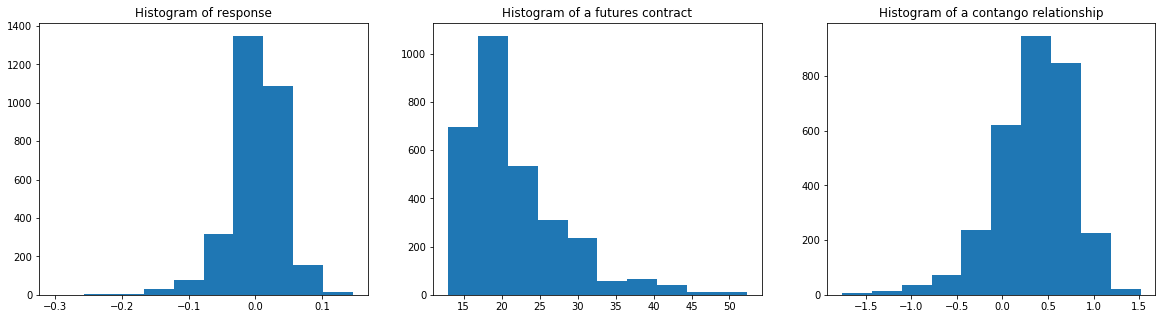

In [57]:
# variables generally are not normal -- the response variable, a contract
# and an example of a contango relationship -- a ratio between two contracts
# log transforms don't really work here due to negative values above -1
# negative values mean boxcox transforms also don't work

plt.figure(figsize = (20, 5))
plt.subplot(1, 3, 1)
plt.hist(reg_response)
plt.title('Histogram of response')
plt.subplot(1, 3, 2)

plt.hist(variables['C4'])
plt.title('Histogram of a futures contract')
plt.subplot(1, 3, 3)
plt.hist(variables['vxxCrush'])
plt.title('Histogram of a contango relationship')
plt.show()
#variables = variables.ffill(axis=1)

# VIX9D Scatterplot

VIX9D starts later than VIX, VIX3M, and VIX6M. We can impute that. Let's look at a scatterplot of values to visualize the relationship.

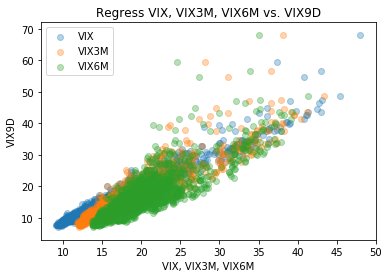

In [58]:
# impute NAs for VIX9D using basic linear regression
# plot relationships between fast and med/slow crosses
plt.scatter(x = variables['VIX'], y = variables['VIX9D'], alpha = .33)
plt.scatter(x = variables['VIX3M'], y = variables['VIX9D'], alpha = .33)
plt.scatter(x = variables['VIX6M'], y = variables['VIX9D'], alpha = .33)
plt.title('Regress VIX, VIX3M, VIX6M vs. VIX9D')
plt.xlabel('VIX, VIX3M, VIX6M')
plt.ylabel('VIX9D')
plt.legend(['VIX', 'VIX3M', 'VIX6M'])


In [ ]:

import statsmodels as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV

tmp = variables.loc[:,['VIX9D', 'VIX', 'VIX3M', 'VIX6M']]
tmp.head()
X_train = tmp.loc[:,['VIX9D', 'VIX', 'VIX3M', 'VIX6M']].dropna()
y_train = tmp.loc[:,'VIX9D'].dropna()
X_test = tmp.loc[tmp.VIX9D.isnull(),['VIX', 'VIX3M', 'VIX6M']]

del X_train['VIX9D']
# as we can see, there is high correlation between VIX9D vs. VIX/VIX3M/VIX6M. 
# We can run a linear regression model to impute these NA values.

In [11]:
X_train.head()
#y_train.head()
X_test

,VIX,VIX3M,VIX6M
Index,,,
2008-01-07,23.79,23.22,24.22
2008-01-08,25.43,25.49,25.18
2008-01-09,24.12,24.50,24.48
2008-01-10,23.45,23.95,24.57
2008-01-11,23.68,24.50,24.96
2008-01-14,22.90,23.67,24.41
2008-01-15,23.34,24.39,24.90
2008-01-16,24.38,24.36,24.64
2008-01-17,28.46,26.44,26.52


To impute VIX9D, we'll try a lasso, ridge, and elastic net CV linear regression on VIX, VIX3M, and VIX6M.

In [12]:
# see which linear regression model gives us best training CV error to impute
# NAs with

alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter = 10000)
lasso_cv.fit(X_train, y_train)
print("Best alpha value is: {}".format(lasso_cv.alpha_))
def print_train_stats(X_train, y_train, model):
  model.fit(X_train, y_train)
  y_preds_train = model.predict(X_train)

  print("R-squared of the model in training set is: {}".format(model.score(X_train, y_train)))
  print("Mean absolute error of the prediction in training is: {}".format(mean_absolute_error(y_train, y_preds_train)))
  print("Mean squared error of the prediction in training is: {}".format(mse(y_train, y_preds_train)))
  print("Root mean squared error of the prediction in training is: {}".format(rmse(y_train, y_preds_train)))
  print("Mean absolute percentage error of the prediction in training is: {}".format(np.mean(np.abs((y_train - y_preds_train) / y_train)) * 100))
print_train_stats(X_train, y_train, lasso_cv)

Best alpha value is: 0.01
R-squared of the model in training set is: 0.9649059815644109
Mean absolute error of the prediction in training is: 0.8469905408283757
Mean squared error of the prediction in training is: 1.4236402689235153
Root mean squared error of the prediction in training is: 1.1931639740301898
Mean absolute percentage error of the prediction in training is: 5.53762673630643


In [13]:
# ridge regression

ridge_cv = RidgeCV(alphas = alphas, cv = 5)
ridge_cv.fit(X_train, y_train)
print("Best alpha value is: {}".format(ridge_cv.alpha_))
print_train_stats(X_train, y_train, ridge_cv)

C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best alpha value is: 10.0
R-squared of the model in training set is: 0.9649860719171175
Mean absolute error of the prediction in training is: 0.8478468386387242
Mean squared error of the prediction in training is: 1.4203912864373764
Root mean squared error of the prediction in training is: 1.19180169761474
Mean absolute percentage error of the prediction in training is: 5.55056533520237


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [14]:
elastic_cv = ElasticNetCV(alphas = alphas, cv = 5, max_iter = 10000)
elastic_cv.fit(X_train, y_train)

print("Best alpha value is: {}".format(elastic_cv.alpha_))
print_train_stats(X_train, y_train, elastic_cv)

Best alpha value is: 0.01
R-squared of the model in training set is: 0.964917525850025
Mean absolute error of the prediction in training is: 0.8466689538347143
Mean squared error of the prediction in training is: 1.4231719580657474
Root mean squared error of the prediction in training is: 1.1929677104036585
Mean absolute percentage error of the prediction in training is: 5.535521842613312


# Impute VIX9D, C7, C8 contangos

We use elastic net for imputing VIX9D from regressing it on VIX, VIX3M, and VIX6M  
We then create a fastcross variable that is the ratio of VIX9D divided by VIX.  
Lastly, we impute missing values for C7 and C8 by multiplying the last contract before them by the contango relationship between the two contracts previous to them.

In [15]:
# use elastic 

variables.VIX9D[0:754] = elastic_cv.predict(X_test)
variables['fastcross'] = variables['VIX9D']/variables['VIX']
# impute missing C7s with C6 multiplied by C6/C5 contango

variables['C7'][variables.C7.isnull()] = variables['C6'][variables.C7.isnull()] * variables['C6'][variables.C7.isnull()]/ variables['C5'][variables.C7.isnull()]

# repeat for C8
variables['C8'][variables.C8.isnull()] = variables['C7'][variables.C8.isnull()] * variables['C7'][variables.C8.isnull()]/ variables['C6'][variables.C8.isnull()]
variables['m4m7_contango'] = variables['C7']/variables['C4']


In [16]:
variables.head()
# imputation successful!

,VIX9D,VIX,VIX3M,VIX6M,C1,C2,C3,C4,C5,C6,...,vxxCrush,m1_roll_yield,VX30_roll_yield,contango,adj_contango,m4m7_contango,fastcross,medcross,slowcross,stratcross
Index,,,,,,,,,,,,,,,,,,,,,
2008-01-07,25.607299,23.79,23.22,24.22,24.12,24.81,24.54,24.45,24.37,24.28,...,0.171019,0.013871,0.031596,0.028607,0.017657,0.986912,1.076389,1.024548,0.982246,0.958712
2008-01-08,26.572768,25.43,25.49,25.18,25.54,25.90,25.52,25.35,25.17,25.07,...,0.074774,0.004326,0.013763,0.014096,0.012844,0.980671,1.044938,0.997646,1.009929,1.012311
2008-01-09,24.972582,24.12,24.50,24.48,24.89,25.78,25.28,24.76,24.66,24.49,...,0.318373,0.031924,0.058573,0.035757,0.019474,0.985057,1.035347,0.984490,0.985294,1.000817
2008-01-10,24.272276,23.45,23.95,24.57,24.07,24.95,24.51,24.36,24.27,24.15,...,0.301873,0.026439,0.055627,0.036560,0.015800,0.980296,1.035065,0.979123,0.954416,0.974766
2008-01-11,24.213251,23.68,24.50,24.96,24.96,26.15,26.05,25.92,25.50,25.50,...,0.522062,0.054054,0.095932,0.047676,0.009141,0.974151,1.022519,0.966531,0.948718,0.981571


In [21]:
# endpoints function for rolling predictions
 
def endpoints(df, on = "M", offset = 0):
    """
    Returns index of endpoints of a time series analogous to R's endpoints
    function. 
    Takes in: 
        df -- a dataframe/series with a date index
          
        on -- a string specifying frequency of endpoints
          
        (E.G. "M" for months, "Q" for quarters, and so on)
          
        offset -- to offset by a specified index on the original data
        (E.G. if the data is daily resolution, offset of 1 offsets by a day)
        This is to allow for timing luck analysis. Thank Corey Hoffstein.
    """
      
    # to allow for familiarity with R
    # "months" becomes "M" for resampling
    if len(on) > 3:
        on = on[0].capitalize()
      
    # get index dates of formal endpoints
    ep_dates = pd.Series(df.index, index = df.index).resample(on).max()
      
    # get the integer indices of dates that are the endpoints
    date_idx = np.where(df.index.isin(ep_dates))
      
    # append zero and last day to match R's endpoints function
    # remember, Python is indexed at 0, not 1
    date_idx = np.insert(date_idx, 0, 0)
    date_idx = np.append(date_idx, df.shape[0]-1)
    if offset != 0:
        date_idx = date_idx + offset
        date_idx[date_idx < 0] = 0
        date_idx[date_idx > df.shape[0]-1] = df.shape[0]-1
    out = np.unique(date_idx)
    return out   
 

# More Feature Engineering -- Moving Averages of Crossover Ratios

Do a bit more feature engineering -- moving averages of the crossover ratios. 9 day moving average for the fast, 21 day for the medium, and 60 days for the slow ones. Also, add in the responses to the data set of all the variables.

Furthermore, let's visualize the correlations between the variables and the responses.

In [22]:
# a bit of feature engineering in the variables
variables['fast_diff'] = variables['fastcross'] / variables['fastcross'].rolling(9).mean() -1
variables['med_diff'] = variables['medcross'] / variables['medcross'].rolling(21).mean() -1

# this last one is a feature in my own trading strategy -- I need the ratio to be below its 60 day
# simple moving average
variables['slow_diff'] = variables['slowcross'] / variables['slowcross'].rolling(60).mean() -1
variables['strat_diff'] = variables['stratcross']/variables['stratcross'].rolling(60).mean() - 1

variables['response'] = reg_response
variables.tail()
variables.corr()['response']
variables['clf_response'] = clf_response

Text(0.5, 1.0, 'Raw variable correlations')

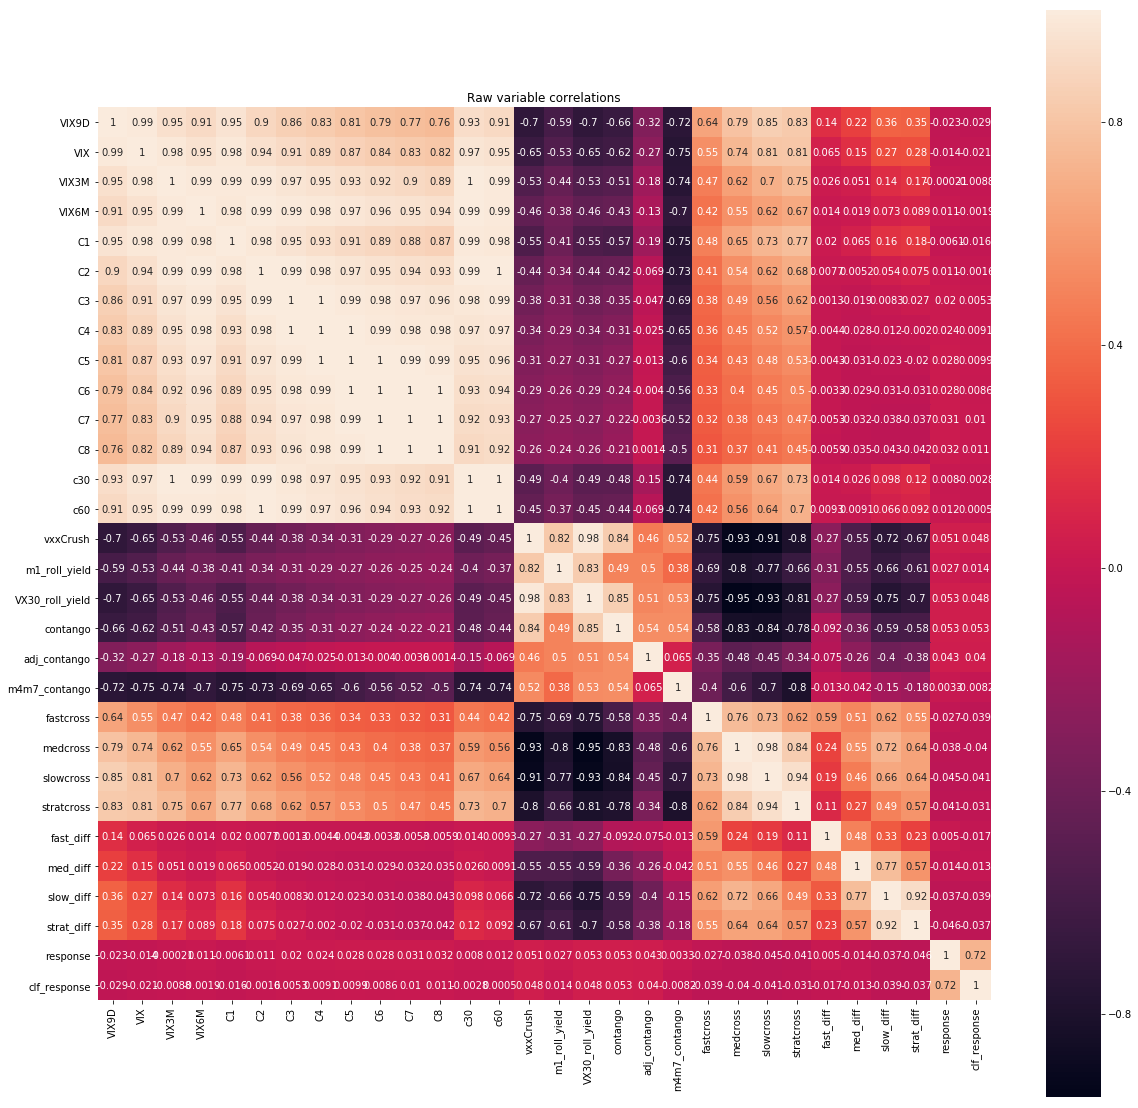

In [23]:
variables = variables.dropna() # no real way to impute moving averages before the burn-in window, drop NAs
import seaborn as sns
plt.figure(figsize=(20.,20))
sns.heatmap(variables.corr(), square = True, annot=True)
plt.title('Raw variable correlations')

# Correlation heatmap of the raw variables.
# While there are some interesting things to say about correlations between variables
# All of them ultimately have next to zero correlation with the actual response variable, either for regression or classification.

Text(0.5, 1.0, 'Absolute value of raw variable correlations')

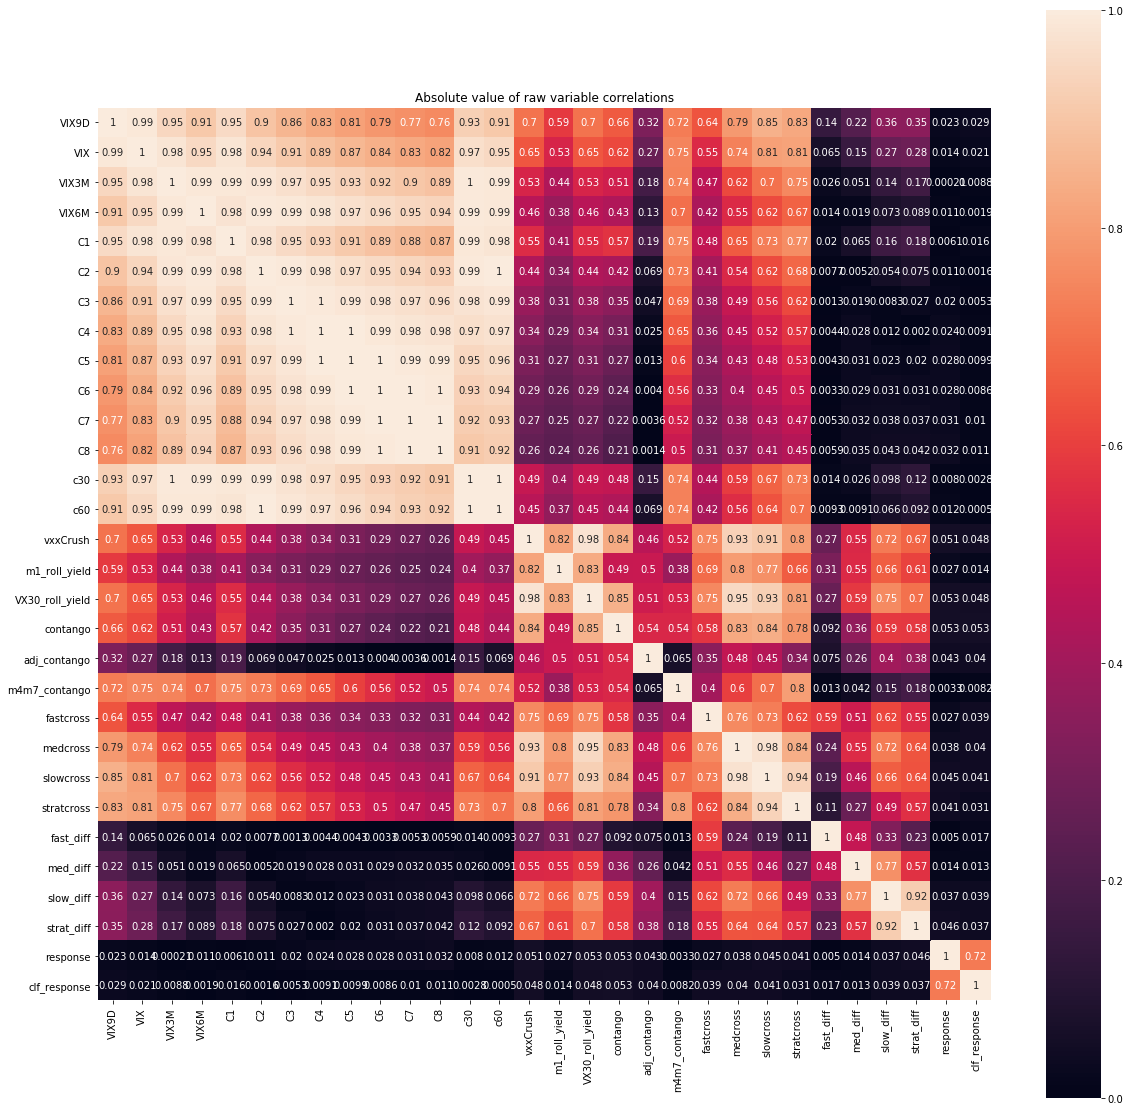

In [24]:
plt.figure(figsize=(20, 20))
sns.heatmap(np.abs(variables.corr()), square = True, annot = True)
plt.title('Absolute value of raw variable correlations')

# A clearer picture -- response is pitch black

# Loop Procedure

1: Subset data starting at 11 months, with 1 month of hold-out period for a prediction period.  
2: Every month, increase this window by 1 month and repeat.  
3: Using this subset data, take 5 sets of PCAs, with 3 apiece, on the following variables: 

    a: the term structure (C1-C8)  
    b: the cash vix term structure (VIX9D, VIX, VIX3M, VIX6M)  
    c: the contango metrics (vxxCrush, M2/M1 contango, adjusted M2/M1 contango, c30 roll yield, M7/M4 contango)  
    d: the ratio crossovers (VIX9D/VIX, VIX/VIX3M, VIX/VIX6M, VIX3M/VIX6M)  
    e: the moving averages of the ratio crossovers (9, 21, 60, and 60 of the above, respectively)  
    
4: filter out all PCAs with correlation of less than .05 to the response variable (sign of the return)  
5: fit 2 random forests, 2 SVMs, 2 gradient boosting machines on the filtered PCAs  
6: combining their predicted probabilities, run one last gradient boosting machine on the probabilities to train predictions  
7: Repeat all this for the one month test, and predict.  
8: Upon reaching the last month, make everything but the first 11 months the training set, and the first 11 months the testing set, so as to avoid throwing out data.

In [25]:
# Just do our test work with the first 11 months (the financial crisis)
# As training data, and then one more month as testing data 
# Before putting all of this into a loop

ep = endpoints(variables)
ep

i = 0
training = variables.iloc[0:ep[i+11]] # use an expanding window
X_train = training.drop(['response', 'clf_response'], axis = 1)
y_train = training['clf_response']

  # one month for testing data
testing = variables.iloc[(ep[i+11]+1):ep[i+12]]
X_test = testing.drop(['response', 'clf_response'], axis = 1)
y_test = testing['clf_response']

In [26]:
# function to create PCs from various chunks of the variables
from sklearn.decomposition import PCA
def pc_xform(train, test, n_pcs, stem = "PC"):
  pcs = PCA(n_components = n_pcs)
  pcs.fit(train)
  train_xform = pd.DataFrame(pcs.transform(train))
  test_xform = pd.DataFrame(pcs.transform(test))
  train_xform.columns = test_xform.columns = [stem + "_" + str(x) for x in np.array(range(1, n_pcs + 1))]
  train_xform = train_xform.set_index(train.index)
  test_xform = test_xform.set_index(test.index)
  return [train_xform, test_xform]

# term structure PCA
ts_pcs = pc_xform(X_train[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']],
                  X_test[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']],
                  n_pcs = 3,
                  stem = "TS")

# contango PCA (m1/m2, m1/vix, c30/vix, etc.)
contango_pcs = pc_xform(X_train[['vxxCrush', 'm1_roll_yield', 'VX30_roll_yield', 'contango', 'adj_contango', 'm4m7_contango']],
                        X_test[['vxxCrush', 'm1_roll_yield', 'VX30_roll_yield', 'contango', 'adj_contango', 'm4m7_contango']],
                        n_pcs = 3,
                        stem = "Cont")
# cash VIX PCA (VIX9D, VIX, VIX3M, VIX6M)
cash_vix_pcs = pc_xform(X_train[['VIX9D','VIX','VIX3M','VIX6M']],
                        X_test[['VIX9D','VIX','VIX3M','VIX6M']],
                        n_pcs = 3,
                        stem = "Cash_Vix")

# cash VIX crossover ratios (EG fast = VIX9D/VIX, med = VIX/VIX3M, slow = VIX/VIX6M, strat = VIX3M/VIX6M)
xover_pcs = pc_xform(X_train[['fastcross', 'medcross', 'slowcross', 'stratcross']],
                     X_test[['fastcross', 'medcross', 'slowcross', 'stratcross']],
                     n_pcs = 3,
                     stem = "Xover")

# moving average PCAs (9 day on fast, 21 on medium, 60 on slow/strat)
maDiff_pcs = pc_xform(X_train[['fast_diff', 'med_diff', 'slow_diff', 'strat_diff']],
                     X_test[['fast_diff', 'med_diff', 'slow_diff', 'strat_diff']],
                     n_pcs = 3,
                     stem = "maDiff")


# put the features together
train_pcs = pd.concat([ts_pcs[0], contango_pcs[0], cash_vix_pcs[0], xover_pcs[0], maDiff_pcs[0], y_train], axis = 1)
test_pcs = pd.concat([ts_pcs[1], contango_pcs[1], cash_vix_pcs[1], xover_pcs[1], maDiff_pcs[1], y_train], axis = 1)

# take a correlation to sign of response variable
cors = train_pcs.corr()['clf_response']


# find relevant features -- those with an abs correlation > .05
relevant_train_features = cors.index.values[(np.abs(cors) > .05) & (np.abs(cors) < 1)]
relevant_train = train_pcs[relevant_train_features]
relevant_test = test_pcs[relevant_train_features]
#plt.imshow(cors, cmap = 'hot', interpolation = 'nearest')

Text(0.5, 1.0, 'Correlation of features to response as trained on first eleven months of data.')

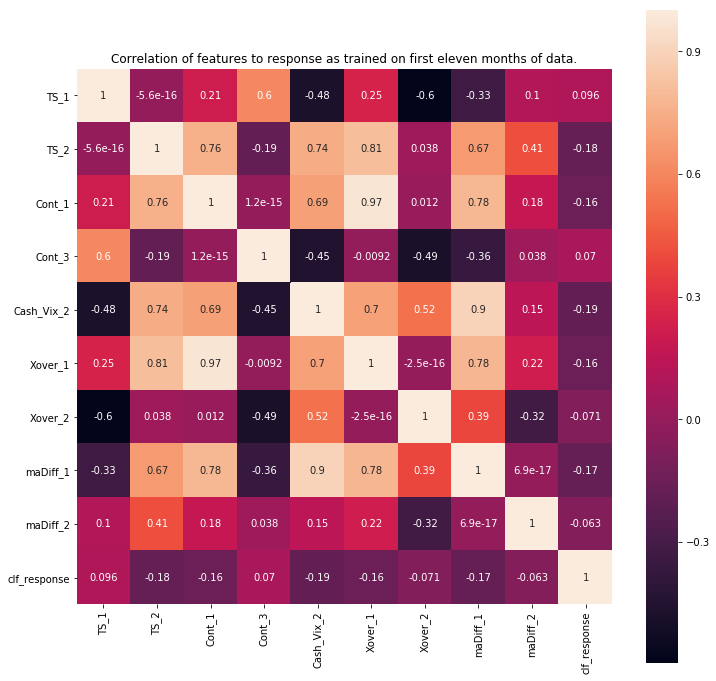

In [27]:
relevant_train_and_response = train_pcs[cors.index.values[(np.abs(cors) > .05)]]
plt.figure(figsize=(12.,12))
sns.heatmap(relevant_train_and_response.corr(), square = True, annot=True)
plt.title("Correlation of features to response as trained on first eleven months of data.")

In [28]:
from sklearn import ensemble
from sklearn.svm import SVC

# fit 2 of each random forest, SVC, GBM classifier
rfc = ensemble.RandomForestClassifier(n_estimators = 400)
rfc.fit(relevant_train, y_train)
# all the features are about as equally important
rfp = pd.DataFrame(rfc.predict_proba(relevant_train))[0]

rf2 = ensemble.RandomForestClassifier(n_estimators = 600)
rf2.fit(relevant_train, y_train)
rf2p = pd.DataFrame(rf2.predict_proba(relevant_train))[0]

svc = SVC(probability = True)
svc.fit(relevant_train, y_train)
svcp = pd.DataFrame(svc.predict_proba(relevant_train))[0]

svc2 = SVC(C=0.5, probability = True)
svc2.fit(relevant_train, y_train)
sv2p = pd.DataFrame(svc2.predict_proba(relevant_train))[0]

gbm = ensemble.GradientBoostingClassifier(n_estimators = 300, max_depth = 3)
gbm.fit(relevant_train, y_train)
gbp = pd.DataFrame(gbm.predict_proba(relevant_train))[0]

gbm2 = ensemble.GradientBoostingClassifier(n_estimators = 200, max_depth = 2)
gbm2.fit(relevant_train, y_train)
gb2p = pd.DataFrame(gbm2.predict_proba(relevant_train))[0]


pred_train_features = pd.concat([rfp, rf2p, svcp, sv2p, gbp, gb2p], axis = 1)
pred_train_features.head()

gbfilt = ensemble.GradientBoostingClassifier(n_estimators = 300, max_depth = 3)
gbfilt.fit(pred_train_features, y_train)
pd.DataFrame(gbfilt.predict(pred_train_features))

# There is not enough time to do 5-fold CV for each of these given that we have ~ 120 months

C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,0
0,-1.0
1,1.0
2,1.0
3,1.0
4,-1.0
5,-1.0
6,-1.0
7,-1.0
8,-1.0
9,1.0


In [29]:
# t = test, p = probability predictions
rftp = pd.DataFrame(rfc.predict_proba(relevant_test.dropna()))[0]
rf2tp = pd.DataFrame(rf2.predict_proba(relevant_test.dropna()))[0]
svctp = pd.DataFrame(svc.predict_proba(relevant_test.dropna()))[0]
svc2tp = pd.DataFrame(svc2.predict_proba(relevant_test.dropna()))[0]
gbmtp = pd.DataFrame(gbm.predict_proba(relevant_test.dropna()))[0]
gbm2tp = pd.DataFrame(gbm2.predict_proba(relevant_test.dropna()))[0]
pred_test_features = pd.concat([rftp, rf2tp, svctp, svc2tp, gbmtp, gbm2tp], axis = 1)
predictions = pd.DataFrame(gbfilt.predict(pred_test_features))

predictions = predictions.set_index(relevant_test.dropna().index)
predictions.columns = ["Sign_Prediction"]

pred_probs = pd.DataFrame(gbfilt.predict_proba(pred_test_features))
pred_probs = pred_probs.set_index(relevant_test.dropna().index)
pred_probs.columns = ["Prob_Down", "Prob_Up"]

preds_probs = pd.concat([predictions, pred_probs], axis = 1)

# On 2009-03-11, the difference between prob down and prob up was very low.
# Maybe this can be used to determine when the algorithm should stay in cash?



In [30]:
# THE BIG LONG LOOP

all_predictions = []
for i in range(0, (len(ep)-11)):
#for i in range(0, 10):
 print(i)

 # variables use a rolling window
 # but the machine learning models use an EXPANDING window
 # Why? Because as human beings, we look at the msot data we can.
 # So should a machine learning model, when all features 
 # Become point in time (that is, what was the value of the features at a date?)
 

 # SPLIT TRAINING AND TESTING DATA HERE. TRAINING USES AN EXPANDING WINDOW
 # TESTING DATA IS ALWAYS THE NEXT MONTH AHEAD. THAT IS, MAINTAIN MODEL FOR ONE MONTH.
 # ONE EXCEPTION -- ONCE WE REACH THE END OF THE SIMULATION,
 # OUR INITIAL TRAINING DATA BECOMES THE TEST SET AND ALL THE ROLLING PERIODS BECOME TRAINING DATA.
 # THIS IS SO WE CAN GET AN "OUT OF SAMPLE" TEST ON THE INITIAL BURN-IN DATA
 if(i < len(ep)-12):
   training = variables.iloc[0:ep[i+11]]   
   testing = variables.iloc[(ep[i+11]+1):ep[i+12]]
 else:
   training = variables.iloc[(ep[11]+1):ep[len(ep)-1]]
   testing = variables.iloc[0:ep[11]]
 
 X_train = training.drop(['response', 'clf_response'], axis = 1)
 y_train = training['clf_response']

 X_test = testing.drop(['response', 'clf_response'], axis = 1)
 y_test = testing['clf_response']

 # THIS IS THE SECTION FOR PCAs AND FEATURE ENGINEERING

 # Term structure PCA
 ts_pcs = pc_xform(X_train[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']],
                  X_test[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']],
                  n_pcs = 3,
                  stem = "TS")
 
 # Contango metrics PCA
 contango_pcs = pc_xform(X_train[['vxxCrush', 'm1_roll_yield', 'VX30_roll_yield', 'contango', 'adj_contango', 'm4m7_contango']],
                        X_test[['vxxCrush', 'm1_roll_yield', 'VX30_roll_yield', 'contango', 'adj_contango', 'm4m7_contango']],
                        n_pcs = 3,
                        stem = "Cont")
 
 # Cash VIX PCA (correlated with contango)
 cash_vix_pcs = pc_xform(X_train[['VIX9D',	'VIX',	'VIX3M',	'VIX6M']],
                        X_test[['VIX9D',	'VIX',	'VIX3M',	'VIX6M']],
                        n_pcs = 3,
                        stem = "Cash_Vix")
 
 # Crossover/ratio PCAs (VIX/VIX3M, etc.)
 xover_pcs = pc_xform(X_train[['fastcross', 'medcross', 'slowcross', 'stratcross']],
                     X_test[['fastcross', 'medcross', 'slowcross', 'stratcross']],
                     n_pcs = 3,
                     stem = "Xover")

 # Difference to a moving average PCAs
 maDiff_pcs = pc_xform(X_train[['fast_diff', 'med_diff', 'slow_diff', 'strat_diff']],
                     X_test[['fast_diff', 'med_diff', 'slow_diff', 'strat_diff']],
                     n_pcs = 3,
                     stem = "maDiff")

 # create data frame of new features
 train_pcs = pd.concat([ts_pcs[0], contango_pcs[0], cash_vix_pcs[0], xover_pcs[0], maDiff_pcs[0], y_train], axis = 1)
 test_pcs = pd.concat([ts_pcs[1], contango_pcs[1], cash_vix_pcs[1], xover_pcs[1], maDiff_pcs[1], y_train], axis = 1)

 cors = train_pcs.corr()['clf_response']

 # use a correlation screen to sift out any insignificant features
 # the new training and testing features will be comprised only of these features
 relevant_train_features = cors.index.values[(np.abs(cors) > .05) & (np.abs(cors) < 1)]
 relevant_train = train_pcs[relevant_train_features]
 relevant_test = test_pcs[relevant_train_features]

 # fit 2 of each random forest, SVC, GBM classifier
 # Use their probability predictions as features to ensemble GBM classifier

 # first random forest
 rfc = ensemble.RandomForestClassifier(n_estimators = 400)
 rfc.fit(relevant_train, y_train)
 rfp = pd.DataFrame(rfc.predict_proba(relevant_train))[0]

 # second random forest
 rf2 = ensemble.RandomForestClassifier(n_estimators = 600)
 rf2.fit(relevant_train, y_train)
 rf2p = pd.DataFrame(rf2.predict_proba(relevant_train))[0]
 
 # default support vector machine
 svc = SVC(probability = True)
 svc.fit(relevant_train, y_train)
 svcp = pd.DataFrame(svc.predict_proba(relevant_train))[0]

 # second support vector machine with bigger regularization penalty
 svc2 = SVC(C=0.5, probability = True)
 svc2.fit(relevant_train, y_train)
 sv2p = pd.DataFrame(svc2.predict_proba(relevant_train))[0]

 # GBM parameterization 1
 gbm = ensemble.GradientBoostingClassifier(n_estimators = 300, max_depth = 3)
 gbm.fit(relevant_train, y_train)
 gbp = pd.DataFrame(gbm.predict_proba(relevant_train))[0]

 # GBM parameterization 2
 gbm2 = ensemble.GradientBoostingClassifier(n_estimators = 200, max_depth = 2)
 gbm2.fit(relevant_train, y_train)
 gb2p = pd.DataFrame(gbm2.predict_proba(relevant_train))[0]

 # cbind the probabilities 
 pred_train_features = pd.concat([rfp, rf2p, svcp, sv2p, gbp, gb2p], axis = 1)

 # filter the six models through one last GBM classifier
 gbfilt = ensemble.GradientBoostingClassifier(n_estimators = 300, max_depth = 3)
 gbfilt.fit(pred_train_features, y_train)

 # create new features by predicting on the test set and cbind
 rftp = pd.DataFrame(rfc.predict_proba(relevant_test.dropna()))[0]
 rf2tp = pd.DataFrame(rf2.predict_proba(relevant_test.dropna()))[0]
 svctp = pd.DataFrame(svc.predict_proba(relevant_test.dropna()))[0]
 svc2tp = pd.DataFrame(svc2.predict_proba(relevant_test.dropna()))[0]
 gbmtp = pd.DataFrame(gbm.predict_proba(relevant_test.dropna()))[0]
 gbm2tp = pd.DataFrame(gbm2.predict_proba(relevant_test.dropna()))[0]
 pred_test_features = pd.concat([rftp, rf2tp, svctp, svc2tp, gbmtp, gbm2tp], axis = 1)
 
 # get predictions and their probabilities with relevant column names
 predictions = pd.DataFrame(gbfilt.predict(pred_test_features))
 predictions = predictions.set_index(relevant_test.dropna().index)
 predictions.columns = ["Sign_Prediction"]

 pred_probs = pd.DataFrame(gbfilt.predict_proba(pred_test_features))
 pred_probs = pred_probs.set_index(relevant_test.dropna().index)
 pred_probs.columns = ["Prob_Down", "Prob_Up"]

 # append them to our initial list of predictions
 preds_probs = pd.concat([predictions, pred_probs], axis = 1)
 all_predictions.append(preds_probs)

0


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


2


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


3


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


4


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


5


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


6


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


7


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


8


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


9


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


10


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


11


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


12


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


13


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


14


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


15


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


16


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


17


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


18


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


19


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


20


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


21


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


22


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


23


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


24


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


25


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


26


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


27


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


28


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


29


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


30


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


31


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


32


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


33


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


34


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


35


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


36


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


37


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


38


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


39


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


40


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


41


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


42


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


43


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


44


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


45


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


46


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


47


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


48


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


49


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


50


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


51


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


52


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


53


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


54


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


55


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


56


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


57


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


58


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


59


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


60


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


61


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


62


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


63


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


64


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


65


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


66


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


67


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


68


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


69


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


70


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


71


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


72


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


73


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


74


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


75


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


76


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


77


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


78


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


79


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


80


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


81


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


82


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


83


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


84


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


85


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


86


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


87


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


88


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


89


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


90


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


91


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


92


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


93


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


94


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


95


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


96


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


97


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


98


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


99


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


100


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


101


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


102


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


103


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


104


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


105


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


106


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


107


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


108


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


109


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


110


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


111


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


112


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


113


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


114


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


115


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


116


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


117


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


118


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


119


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


120


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


121


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


122


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


123


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


124


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


125


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


126


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


127


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


128


C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ilya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 1.0, 'Correlation matrix using 2009+ as training for 2008 test')

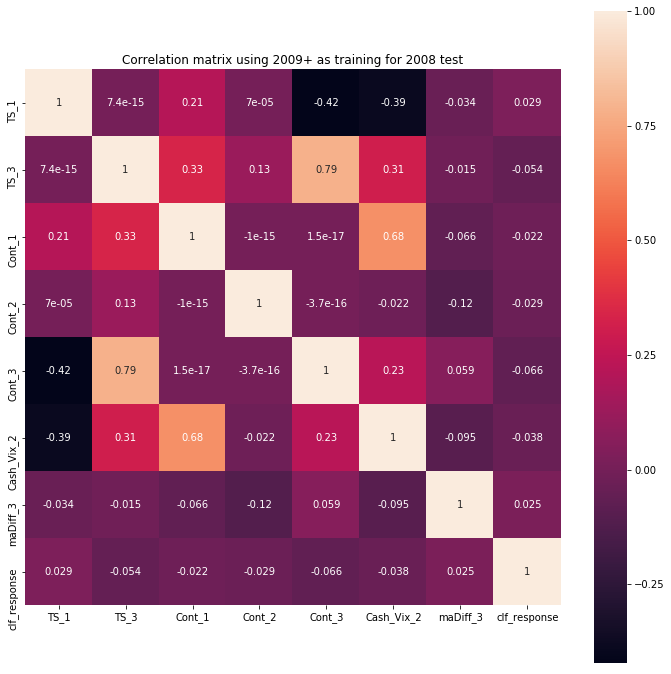

In [34]:
relevant_train_and_response = train_pcs[cors.index.values[(np.abs(cors) > .02)]]
plt.figure(figsize=(12.,12))
sns.heatmap(relevant_train_and_response.corr(), square = True, annot=True)
plt.title("Correlation matrix using 2009+ as training for 2008 test")

# Results And Conclusions

Due to the high conviction (and seemingly random predictions) of the algorithm, the algorithm lost a lot of money.  
Even reversing its signals loses just about all the money.  
PCAs may be useful for trying to predict returns by order of dimension reduction and finding a way to summarize relationships in groups of variables (contract term structure). However, correlation screens may not be the best way of looking at things, either.  
Machine Learning models definitely don't do a good job with the small amount of data given.  

In [41]:
# put together all of the predictions

all_preds_xts = pd.concat(all_predictions, axis=0)
all_preds_xts
all_preds_xts = all_preds_xts.sort_index()

# how certain is our algorithm of its position?
all_preds_xts['abs_prob_diff'] = np.abs(all_preds_xts['Prob_Down'] - all_preds_xts['Prob_Up'])

# returns of the response
all_preds_xts['returns'] = variables['response'] 
all_preds_xts


# our returns are the absolute difference in probability values to use as a proxy for position sizing multiplied by our prediction by the returns
all_preds_xts['strat_rets'] = all_preds_xts['Sign_Prediction'] * all_preds_xts['returns'] * np.abs(all_preds_xts['Prob_Down'] - all_preds_xts['Prob_Up'])
#all_preds_xts


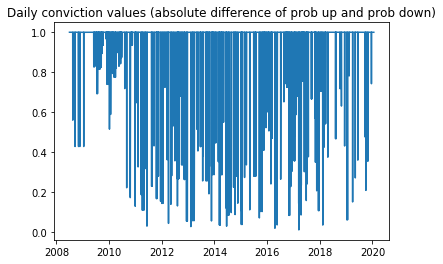

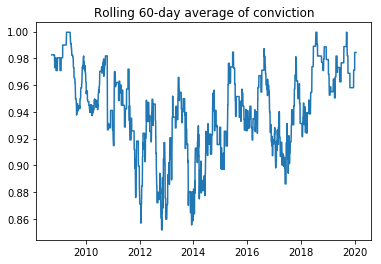

In [36]:

plt.plot(all_preds_xts['abs_prob_diff'])
plt.title("Daily conviction values (absolute difference of prob up and prob down)")
plt.show()
plt.plot(all_preds_xts['abs_prob_diff'].rolling(60).mean())
plt.title("Rolling 60-day average of conviction")
plt.show()


In [39]:
# Performance metrics! This is how we evaluate the performance of the strategy.
# helper functions for evaluating model/strategy performance

# annualized return
# annualized vol 
# drawdown

# From Vijay Vaidyanathan's intro course on Coursera

def annualized_returns(r, periodsInYear = 252):
    return ((1+r).prod()**(periodsInYear/r.shape[0])-1)

def annualized_vol(r, periodsInYear = 252):
    return r.std(ddof=0)*np.sqrt(periodsInYear)

def drawdown(return_series: pd.Series):
    """
    Computes wealth index, drawdowns/max DDs for a time series
    """
    wealth_idx = (1+return_series).cumprod()
    previous_peaks = wealth_idx.cummax()
    drawdown = (wealth_idx-previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth": wealth_idx,
        "Peaks": previous_peaks,
        "Drawdown": drawdown
    })
 
strat_ann_rets = annualized_returns(all_preds_xts['strat_rets'])
strat_vol = annualized_vol(all_preds_xts['strat_rets'])
strat_dd = drawdown(all_preds_xts['strat_rets'])

strat_ann_rets
strat_vol
min(strat_dd['Drawdown'])


-0.9651600085264014

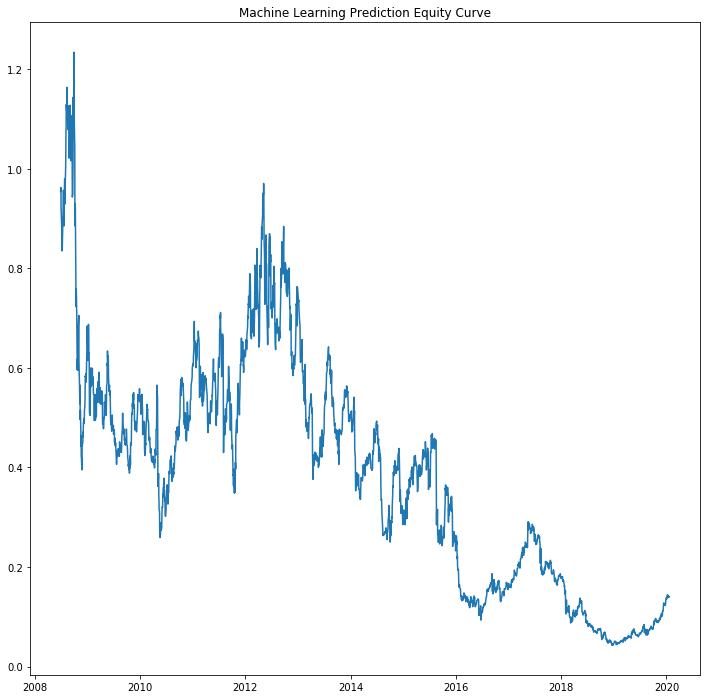

Text(0.5, 1.0, 'Reversed Prediction')

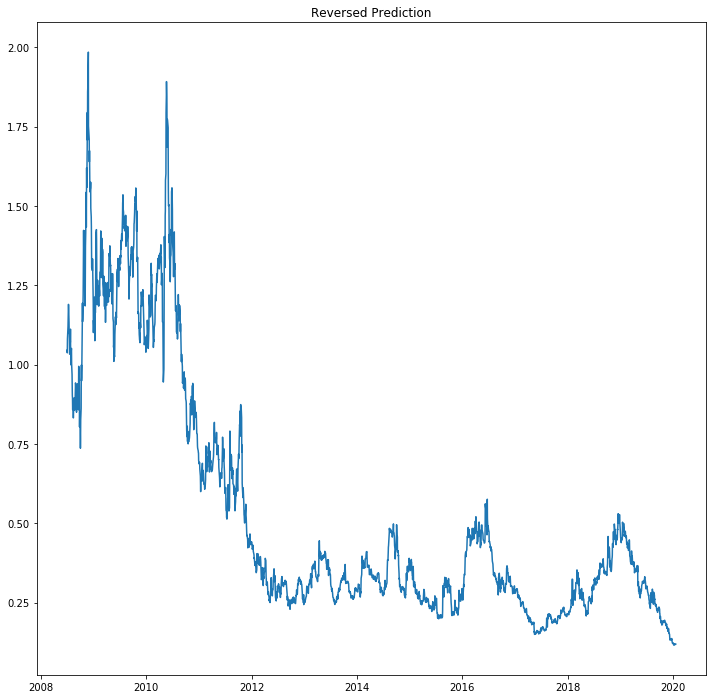

In [37]:

plt.figure(figsize=(12, 12))
# lose all your money
plt.plot(strat_dd['Wealth'])
plt.title("Machine Learning Prediction Equity Curve")
plt.show()

# lose all your money even if you did the exact opposite thing too
plt.figure(figsize = (12, 12))
plt.plot(drawdown(all_preds_xts['strat_rets']*-1)['Wealth'])
plt.title("Reversed Prediction")
